<div class="alert alert-block alert-info">
<h3>Student Information</h3> Please provide information about yourself.<br>
<b>Name1</b>: Michael Ziegler<br>
<b>Name2 (optional) </b>:<br>
<b>NetID 1</b>: mlz48<br>
<b>NetID 2 (optional)</b>:<br>
<b>Notes to Grader</b> (optional):<br>
<br><br>
<b>IMPORTANT</b>
Your work will not be graded withour your initials below<br>
I certify that this lab represents my own work and I have read the RU academic intergrity policies at<br>
<a href="https://www.cs.rutgers.edu/academic-integrity/introduction">https://www.cs.rutgers.edu/academic-integrity/introduction </a><br>
<b>Initials</b>: MZ    


<h3>Grader Notes</h3>
<b>Your Grade<b>:<br>
<b>Grader Initials</b>:<br>
<b>Grader Comments</b> (optional):<br>
</div>

### CS 439 - Introduction to Data Science
### Fall 2019

# Midsemester Project : Twitter Analysis

### Due Date : November 4th, 2019 by 11:59 PM.###


### About this project
This is your mid-semester project. You are allowed to work with a partner (if you'd like). Only one partner (or max two per group is allowed). The goal of this mid-semester project is to work with Twitter API to analyze tweets from a person, and in this case, President Donald Trump.  @RealDonaldTrump tweets provide a great opportunity to understand how online media can be used to communicate over the traditional media. Moreoover, Trump tweets has become so consequential, they actually can move the stock market on short term and get network TV to debate and discuss hours and hours about what Trump meant.

We hope this project will be fun as we can analyze range of emotions, hope, controversy, vagueness that are part of Trump tweets. We are interested in seeing what conclusions you can draw from US Presidents tweets. 
* DISCLAIMER: This project is not designed with any bias in mind. Note that we could pick either candiadate (Hillary Clinton or Donald Trump) or anyone else to do the same analysis. We hope your analysis is objective, independent of any political bias you may have. As Data Scientists, it is our responsiblity to do independent analysis of the data we try to understand. You should follow data and interpret w/o any bias.


## Set up
Let us get all the libaries initialized as necessary

In [12]:
# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import json

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re

## Downloading Recent Tweets
It is important to download the most recent tweets (especially if you are working as a group). Those who are working by themselves are allowed to use the downloaded files w/o setting up access to any twitter API (which can sometime be bit complicated). Twitter provides the API Tweepy (http://www.tweepy.org/) that makes it easy to access twitter content that is publicly available. We will also provide example code as needed.

In [13]:
## Make sure you have set up tweepy if you are working locally.
# https://www.pythoncentral.io/introduction-to-tweepy-twitter-for-python/
# After set up, the following should run:
import tweepy

## PART 1:  Accessing Twitter API 
In order to access Twitter API, you need to get keys by signing up as a Twitter developer. We will walk you through this process. 
* if you are working by yourself on this project, you can skip PART 1, and complete the project using the data files provided in the data folder. PART 1 is optional for those working by themselves. However, we highly recommend that you do Part 1 (after completing the project with offline data) if you would like to "learn" how to use Twitter API that might be useful.

### Task 1.1

Follow the instructions below to get your Twitter API keys.  **Read the instructions completely before starting.**

1. [Create a Twitter account](https://twitter.com/).  You can use an existing account if you have one; if you prefer to not do this assignment under your regular account, feel free to create a throw-away account.
2. Under account settings, add your phone number to the account.
3. [Create a Twitter developer account](https://developer.twitter.com/en/apply/) by clicking the 'Apply' button on the top right of the page. Attach it to your Twitter account. You'll have to fill out a form describing what you want to do with the developer account. Explain that you are doing this for a class at Rutgers University and that you don't know exactly what you're building yet and just need the account to get started. These applications are approved by some sort of AI system, so it doesn't matter exactly what you write. Just don't enter a bunch of alweiofalwiuhflawiuehflawuihflaiwhfe type stuff or you might get rejected.
4. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.  You don't need to provide a callback URL.
5. On the page for that application, find your Consumer Key and Consumer Secret.
6. On the same page, create an Access Token.  Record the resulting Access Token and Access Token Secret.
7. Edit the file [keys.json](keys.json) and replace the placeholders with your keys.

## WARNING (Please Read) !!!!


### Protect your Twitter Keys
<span style="color:red">
If someone has your authentication keys, they can access your Twitter account and post as you!  So don't give them to anyone, and **don't write them down in this notebook**. 
</span>
The usual way to store sensitive information like this is to put it in a separate file and read it programmatically.  That way, you can share the rest of your code without sharing your keys.  That's why we're asking you to put your keys in `keys.json` for this assignment.


### Avoid making too many API calls.

<span style="color:red">
Twitter limits developers to a certain rate of requests for data.  If you make too many requests in a short period of time, you'll have to wait awhile (around 15 minutes) before you can make more.  </span> 
So carefully follow the code examples you see and don't rerun cells without thinking.  Instead, always save the data you've collected to a file.  We've provided templates to help you do that.


### Be careful about which functions you call!

<span style="color:red">
This API can retweet tweets, follow and unfollow people, and modify your twitter settings.  Be careful which functions you invoke! </span> It is possible that you can accidentally re-tweet some tweets because you typed `retweet` instead of `retweet_count`. 
</span>


In [14]:
import json
key_file = 'keys.json'
# Loading your keys from keys.json (which you should have filled
# in in question 1):
with open(key_file) as f:
    keys = json.load(f)
# if you print or view the contents of keys be sure to delete the cell!

### Task 1.2 Testing Twitter Authentication
This following code should run w/o erros or warnings and display yur twitter username. If you are working as a team, try to get a new twitter account with user names as :  student1NetId_Student2NetId (eg:  ds1089_adg133)

In [15]:
import tweepy
from tweepy import TweepError
import logging

try:
    auth = tweepy.OAuthHandler(keys["consumer_key"], keys["consumer_secret"])
    auth.set_access_token(keys["access_token"], keys["access_token_secret"])
    api = tweepy.API(auth)
    print("Your username is:", api.auth.get_username())
except TweepError as e:
    logging.warning("There was a Tweepy error. Double check your API keys and try again.")
    logging.warning(e)

## PART 2 - Working with Twitter
The json file in data folder contains (to be downloaded by you) some loaded tweets from @RutgersU. Run it and read the code. You can also try other json files in the data folder to try this. 

In [16]:
from pathlib import Path
import json

ds_tweets_save_path = "data/2016-2017.json"   # need to get this file

# Guarding against attempts to download the data multiple
# times:
if not Path(ds_tweets_save_path).is_file():
    # Getting as many recent tweets by @RutgersU as Twitter will let us have.
    # We use tweet_mode='extended' so that Twitter gives us full 280 character tweets.
    # This was a change introduced in September 2017.
    
    # The tweepy Cursor API actually returns "sophisticated" Status objects but we 
    # will use the basic Python dictionaries stored in the _json field. 
    example_tweets = [t._json for t in tweepy.Cursor(api.user_timeline, id="RutgersU", 
                                             tweet_mode='extended').items()]
    
    # Saving the tweets to a json file on disk for future analysis
    with open(ds_tweets_save_path, "w") as f:        
        json.dump(example_tweets, f)

# Re-loading the json file:
with open(ds_tweets_save_path, "r") as f:
    example_tweets = json.load(f)

If things ran as expected, you should be able to look at the first tweet by running the code below. It probabably does not make sense to view all tweets in a notebook, as size of the tweets can freeze your browser (always a good idea to press ctrl-S to save the latest, in case you have to restart Jupyter)

In [17]:
# Looking at one tweet object, which has type Status: 
from pprint import pprint # ...to get a more easily-readable view.
pprint(example_tweets[0])

{'created_at': 'Mon Jan 01 13:37:52 +0000 2018',
 'favorite_count': 51473,
 'id': '947824196909961216',
 'in_reply_to_user_id_str': None,
 'is_retweet': False,
 'retweet_count': 8237,
 'source': 'Twitter for iPhone',
 'text': 'Will be leaving Florida for Washington (D.C.) today at 4:00 P.M. '
         'Much work to be done, but it will be a great New Year!'}


### Task 2.1 (Optional for Individuals)

### What you need to do. 

Re-factor the above code fragment into reusable snippets below.  You should not need to make major modifications; this is mostly an exercise in understanding the above code block. 

In [18]:
def load_keys(path):
    """Loads your Twitter authentication keys from a file on disk.
    
    Args:
        path (str): The path to your key file.  The file should
          be in JSON format and look like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }
    
    Returns:
        dict: A dictionary mapping key names (like "consumer_key") to
          key values."""
    
    ### BEGIN SOLUTION
    
    # your solution here

    ### END SOLUTION

In [19]:
def download_recent_tweets_by_user(user_account_name, keys):
    """Downloads tweets by one Twitter user.

    Args:
        user_account_name (str): The name of the Twitter account
          whose tweets will be downloaded.
        keys (dict): A Python dictionary with Twitter authentication
          keys (strings), like this (but filled in):
            {
                "consumer_key": "<your Consumer Key here>",
                "consumer_secret":  "<your Consumer Secret here>",
                "access_token": "<your Access Token here>",
                "access_token_secret": "<your Access Token Secret here>"
            }

    Returns:
        list: A list of Dictonary objects, each representing one tweet."""
    import tweepy
    
    ### BEGIN SOLUTION
    # Authenticating:
    
    # your solution here
    
    ### END SOLUTION

In [20]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    ### BEGIN SOLUTION

    # your solution here
    
    ### END SOLUTION

In [21]:
def get_tweets_with_cache(user_account_name, keys_path):
    """Get recent tweets from one user, loading from a disk cache if available.
    
    The first time you call this function, it will download tweets by
    a user.  Subsequent calls will not re-download the tweets; instead
    they'll load the tweets from a save file in your local filesystem.
    All this is done using the functions you defined in the previous cell.
    This has benefits and drawbacks that often appear when you cache data:
    
    +: Using this function will prevent extraneous usage of the Twitter API.
    +: You will get your data much faster after the first time it's called.
    -: If you really want to re-download the tweets (say, to get newer ones,
       or because you screwed up something in the previous cell and your
       tweets aren't what you wanted), you'll have to find the save file
       (which will look like <something>_recent_tweets.pkl) and delete it.
    
    Args:
        user_account_name (str): The Twitter handle of a user, without the @.
        keys_path (str): The path to a JSON keys file in your filesystem.
    """
    
    ### BEGIN SOLUTION
    
    # your solution here

    
    ### END SOLUTION

If everything was implemented correctly you should be able to obtain roughly the last 3000 tweets by the realdonaldtrump. (This may take a few minutes)

In [22]:
# When you are done, run this cell to load @realdonaldtrump's tweets.
# Note the function get_tweets_with_cache.  You may find it useful
# later.
trump_tweets = get_tweets_with_cache("realdonaldtrump", key_file)
print("Number of tweets downloaded:", len(trump_tweets))

TypeError: object of type 'NoneType' has no len()

### Task 2.2
To be consistent we are going to use the same dataset no matter what you get from your twitter api. So from this point on, if you are working as a group or individually, be sure to use the data sets provided to you in the zip file. There should be two json files inside your data folder. One is '2017-2018.json', the other one is '2016-2017.json'. We will load the '2017-2018.json' first.

In [23]:
def load_tweets(path):
    """Loads tweets that have previously been saved.
    
    Calling load_tweets(path) after save_tweets(tweets, path)
    will produce the same list of tweets.
    
    Args:
        path (str): The place where the tweets were be saved.

    Returns:
        list: A list of Dictionary objects, each representing one tweet."""
    
    with open(path, "rb") as f:
        import json
        return json.load(f)

In [24]:
dest_path = 'data/2017-2018.json'
trump_tweets = load_tweets(dest_path)

If everything is working correctly correctly this should load roughly the last 3000 tweets by `realdonaldtrump`.

In [25]:
assert 2000 <= len(trump_tweets) <= 4000

If the assert statement above works, then continue on to task 2.3.

### Task 2.3

Find the number of the month of the oldest tweet.

In [26]:
# Enter the number of the month of the oldest tweet (e.g. 1 for January)
oldest_month = 10
### BEGIN SOLUTION
dates=[]
for x in trump_tweets:
    dates.append(x['created_at'])

##list already sorted by recency so just find the last
dates[len(trump_tweets) - 1].split(' ')[1]

### END SOLUTION

'Oct'

## PART 3  Twitter Source Analysis



### Task 3.1

Create a new date frame from `2016-2017.json` and merge with `trump_tweets` 

**Important:** There may/will be some overlap so be sure to eliminate duplicate tweets. If you do not eliminate the duplicates properly, your results might not be compatible with the test solution. 

**Hint:** the `id` of a tweet is always unique.

In [27]:
### BEGIN SOLUTION
old_tweets = load_tweets("data/2016-2017.json")
old_tweets = pd.DataFrame(old_tweets)
old_tweets['id'] = pd.to_numeric(old_tweets['id'])
new_tweets = pd.DataFrame(trump_tweets)
new_tweets['id'] = pd.to_numeric(new_tweets['id'])

all_tweets = pd.merge(old_tweets, new_tweets, how='outer', on='id')
### END SOLUTION

assert(len(all_tweets) == 9478)

### Task 3.2
Construct a DataFrame called `df_trump` containing all the tweets stored in `all_tweets`. The index of the dataframe should be the ID of each tweet (looks something like `907698529606541312`). It should have these columns:

- `time`: The time the tweet was created encoded as a datetime object. (Use `pd.to_datetime` to encode the timestamp.)
- `source`: The source device of the tweet.
- `text`: The text of the tweet.
- `retweet_count`: The retweet count of the tweet. 

Finally, **the resulting dataframe should be sorted by the index.**

**Warning:** *Some tweets will store the text in the `text` field and other will use the `full_text` field.*

**Warning:** *Don't forget to check the type of index*

In [28]:
### BEGIN SOLUTION
from datetime import datetime
df_trump = pd.DataFrame(all_tweets[['id','created_at_x', 'created_at_y','source_x', 'source_y','full_text', 'text', 'retweet_count_y', 'retweet_count_x']]).sort_values(by='id')
df_trump = df_trump.set_index('id')
df_trump['text'] = df_trump['text'].fillna(df_trump['full_text'])
df_trump = df_trump.drop(['full_text'], axis=1)
df_trump['retweet_count_y'] = df_trump['retweet_count_y'].fillna(df_trump['retweet_count_x'])
df_trump = df_trump.drop(['retweet_count_x'], axis=1)
df_trump['source_x'] = df_trump['source_x'].fillna(df_trump['source_y'])
df_trump = df_trump.drop(['source_y'], axis=1)
df_trump['created_at_x'] = df_trump['created_at_x'].fillna(df_trump['created_at_y'])
df_trump = df_trump.drop(['created_at_y'], axis=1)
df_trump['created_at_x'] = df_trump['created_at_x'].astype(str).apply(lambda x: pd.to_datetime(x))
df_trump = df_trump.rename(columns={'created_at_x':'time', 'source_x': 'source', 'retweet_count_y': 'retweet_count'})

df_trump
                
### END SOLUTION

,time,source,text,retweet_count
id,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108.0
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460.0
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721.0
683037464504745985,2016-01-01 21:29:56+00:00,Twitter for Android,"""@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win - go Donald Trump""",933.0
683060169677344768,2016-01-01 23:00:09+00:00,Twitter for Android,"Well, the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!",2642.0
683060654098530305,2016-01-01 23:02:05+00:00,Twitter for Android,"""@marie7777777777: @realDonaldTrump we love u to Trump Family. God bless you.""",654.0
683061678246903808,2016-01-01 23:06:09+00:00,Twitter for Android,"""@JodiL792: We are Standing with you! Spreading the Word...Trump for President 2016!! I wake &amp; sleep praying for you &amp; the USA!+Israel2""",893.0


In the following questions, we are going to find out the charateristics of Trump tweets and the devices used for the tweets.

First let's examine the source field:

In [29]:
df_trump['source'].unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client',
       'Mobile Web (M5)', 'Instagram', 'Twitter Ads', 'Twitter for iPad',
       'Media Studio', 'TweetDeck', 'Periscope',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://studio.twitter.com" rel="nofollow">Media Studio</a>',
       '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>'],
      dtype=object)

## Task 3.3

Remove the HTML tags from the source field. 

**Hint:** Use `df_trump['source'].str.replace` and your favorite regular expression.

In [30]:
### BEGIN SOLUTION
ex = re.compile('<.*?>')
df_trump['source'] = df_trump['source'].apply(lambda x: re.sub(ex,'',x))
## END SOLUTION

### Make a plot to find out the most common device types used in accessing twitter

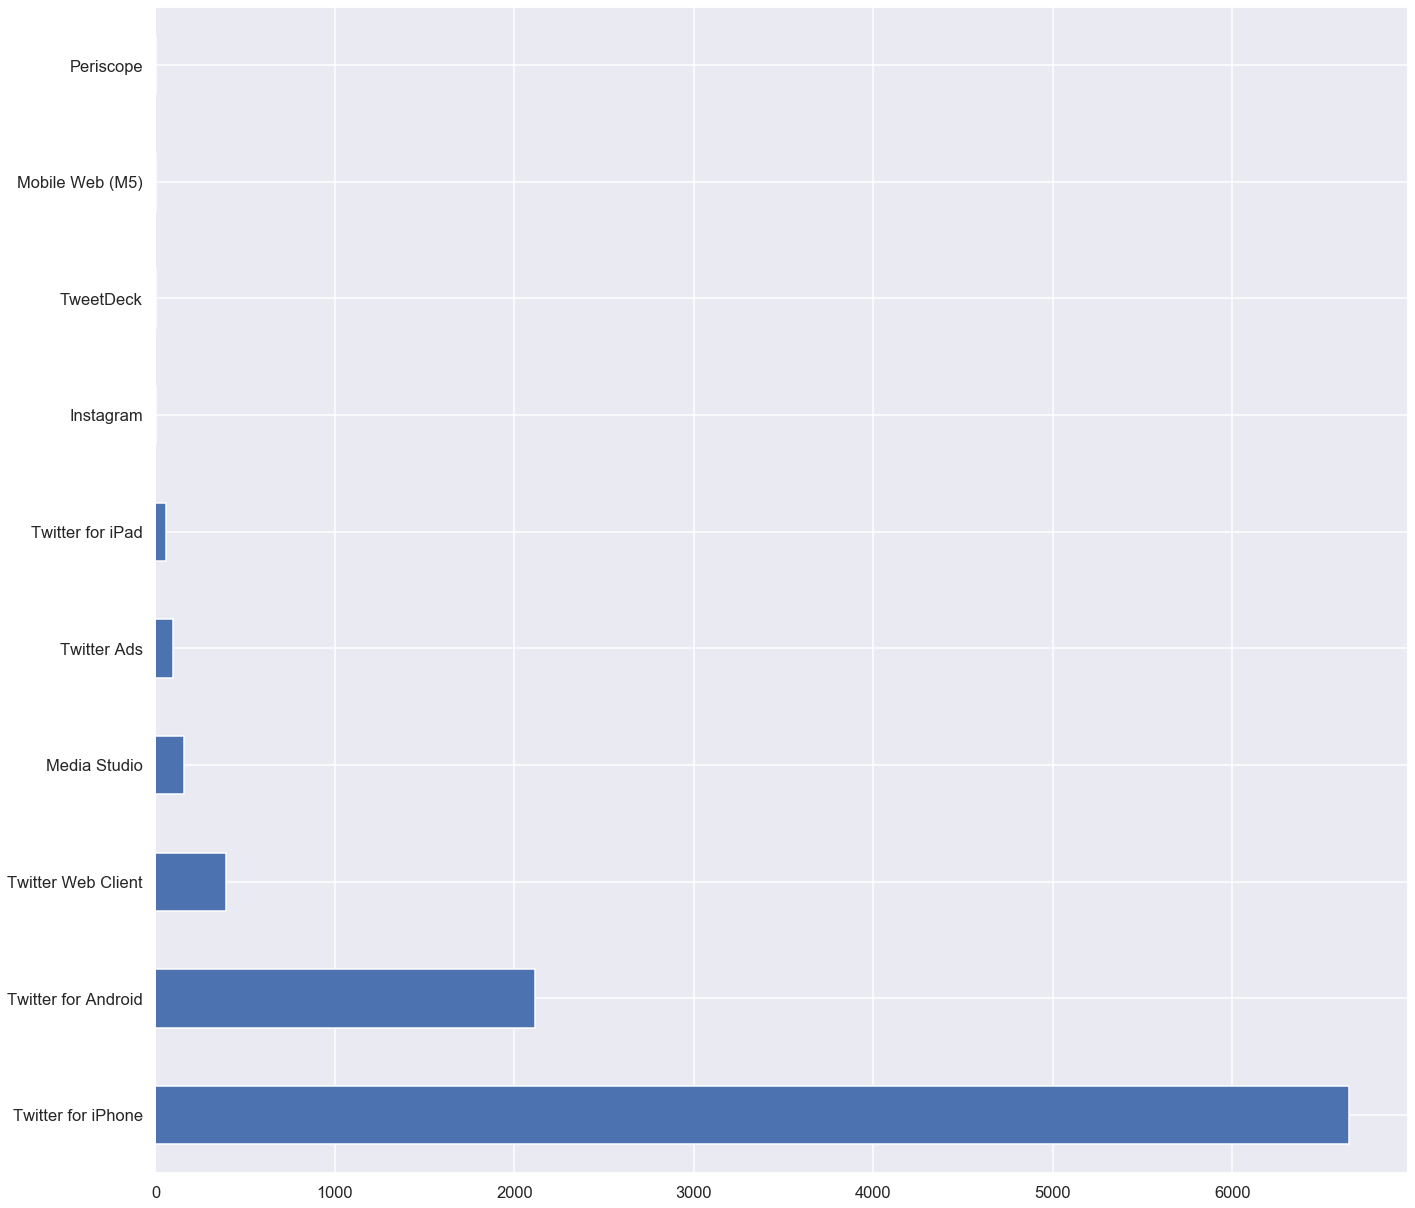

In [31]:
### BEGIN SOLUTION

ax = df_trump['source'].value_counts().plot(kind='barh', figsize=(20,20))
### END SOLUTION

### Task 3.4
Is there a difference between his Tweet behavior across these devices? We will attempt to answer this question in our subsequent analysis.

First, we'll take a look at whether Trump's tweets from an Android come at different times than his tweets from an iPhone. Note that Twitter gives us his tweets in the [UTC timezone](https://www.wikiwand.com/en/List_of_UTC_time_offsets) (notice the `+0000` in the first few tweets)

In [32]:
df_trump['time'][0:3]

id
682723973449289728   2016-01-01 00:44:14+00:00
682764544402440192   2016-01-01 03:25:27+00:00
682792967736848385   2016-01-01 05:18:23+00:00
Name: time, dtype: datetime64[ns, UTC]

We'll convert the tweet times to US Eastern Time, the timezone of New York and Washington D.C., since those are the places we would expect the most tweet activity from Trump.

In [33]:
df_trump['est_time'] = (
    df_trump['time'] # Set initial timezone to UTC
                 .dt.tz_convert("EST") # Convert to Eastern Time
)
df_trump.head()

,time,source,text,retweet_count,est_time
id,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"I will be on @FoxNews live, with members of my family, at 11:50 P.M. We will ring in the New Year together! MAKE AMERICA GREAT AGAIN!",2108.0,2015-12-31 19:44:14-05:00
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,HAPPY NEW YEAR &amp; THANK YOU! https://t.co/YO1Yi8QbZy https://t.co/uxUXWJ1Rbv,3460.0,2015-12-31 22:25:27-05:00
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#HappyNewYearAmerica! https://t.co/EeQb8PDrUe,3434.0,2016-01-01 00:18:23-05:00
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support. https://t.co/6UsqSiaaj7,1948.0,2016-01-01 01:07:28-05:00
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: Hillary said she was in a ""Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2721.0,2016-01-01 01:08:06-05:00


**What you need to do:**

Add a column called `hour` to the `df_trump` table which contains the hour of the day as floating point number computed by:

$$
\text{hour} + \frac{\text{minute}}{60} + \frac{\text{second}}{60^2}
$$


[Text(0, 0.5, 'Hour of day'),
 Text(0.5, 0, 'Count'),
 Text(0.5, 1.0, 'The hour of the day that Trump uses Twitter')]

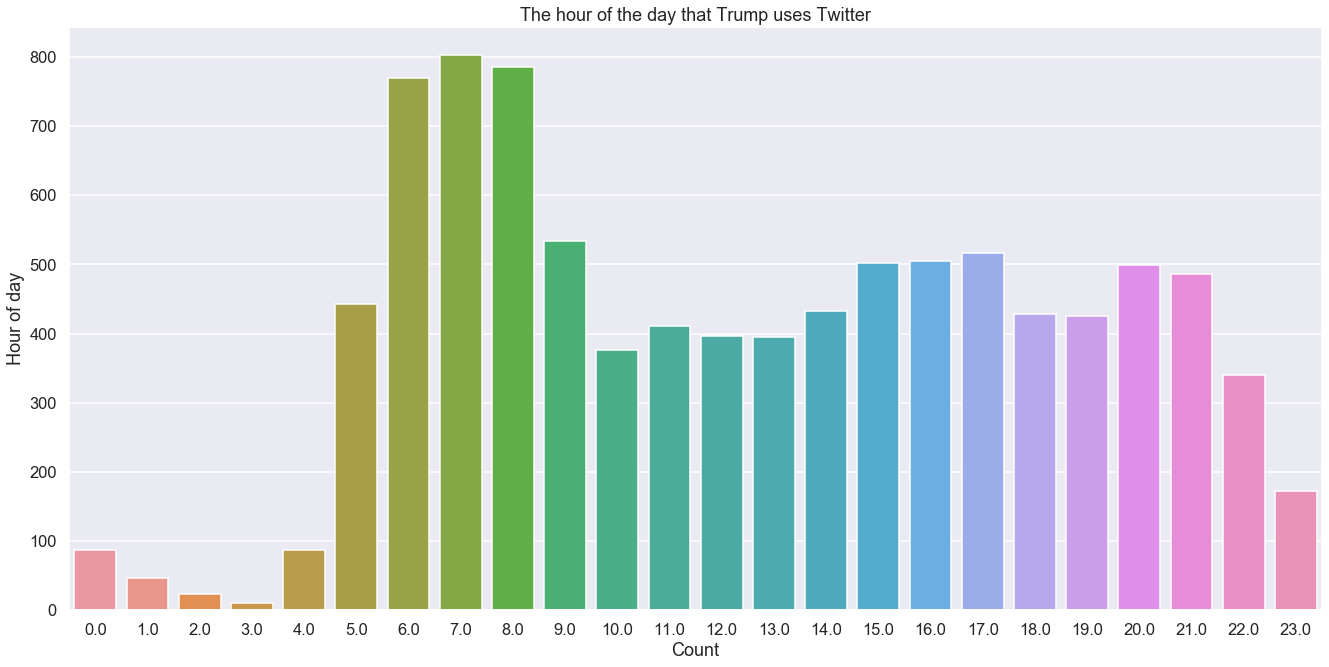

In [34]:
def convertToHour(time):
    temp = str(time).split()[1]
    time = temp.split('-')[0]
    timeFields =time.split(':')
    return float(timeFields[0]) + float(timeFields[1])/60 + float(timeFields[2])/3600

df_trump['hour'] = df_trump['est_time'].apply(convertToHour)
# make a bar plot here
### BEGIN SOLUTION
plt.figure(figsize=(20,10))
ax = sns.countplot(x=df_trump['hour'].apply(np.floor), data=df_trump)
ax.set(xlabel="Count", ylabel="Hour of day", title="The hour of the day that Trump uses Twitter")
### END SOLUTION

In [35]:
assert np.isclose(df_trump.loc[690171032150237184]['hour'], 8.93639)


Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 
![title](images/image1.png)


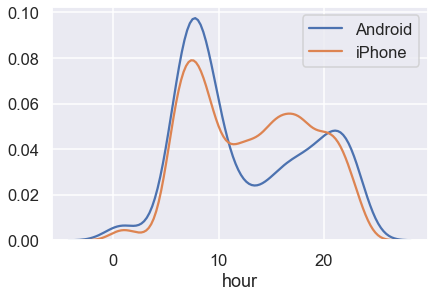

In [36]:
### BEGIN SOLUTION
### make your plot here
sns.distplot(df_trump[df_trump.source == 'Twitter for Android']['hour'], label='Android', hist=False)
sns.distplot(df_trump[df_trump.source == 'Twitter for iPhone']['hour'], label='iPhone', hist=False)
plt.legend()
### END SOLUTION

### Task 3.5

According to [this Verge article](https://www.theverge.com/2017/3/29/15103504/donald-trump-iphone-using-switched-android), Donald Trump switched from an Android to an iPhone sometime in March 2017.

Create a figure identical to your figure from 3.4, except that you should show the results only from 2016. If you get stuck consider looking at the `year_fraction` function from the next problem.

Use this data along with the seaborn `distplot` function to examine the distribution over hours of the day in eastern time that trump tweets on each device for the 2 most commonly used devices.  Your plot should look somewhat similar to the following. 

During the campaign, it was theorized that Donald Trump's tweets from Android were written by him personally, and the tweets from iPhone were from his staff. Does your figure give support the theory?

Response: In 2016, the time allocation for the usage of the iphone centered in the afternoon, while his tweets from 2015 to present shows that he mostly tweets in the morning. It seems that the tweets from iphone in 2016 were from his staff, not himself.

![title](images/device_hour2.png)

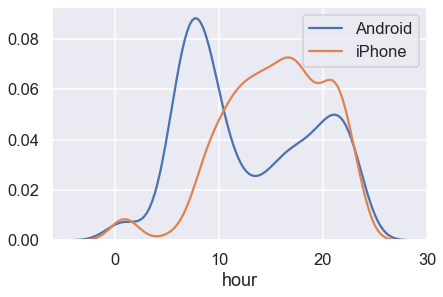

In [37]:
### BEGIN SOLUTION
def tempYear(x):
    return str(x).split('-')[0]

df_trump['year'] = df_trump['time'].apply(tempYear)
df_trump_2016 = df_trump[df_trump.year == "2016"]
sns.distplot(df_trump_2016[df_trump_2016.source == 'Twitter for Android']['hour'], label='Android', hist=False)
sns.distplot(df_trump_2016[df_trump_2016.source == 'Twitter for iPhone']['hour'], label='iPhone', hist=False)
plt.legend()

### END SOLUTION

### Task 3.6
Edit this cell to answer the following questions.
* What time of the day the Android tweets were made by Trump himself? (eg: morning, late night etc)

<b>Since Trump's iPhone tweets were made primarily in the afternoon, we can theorize that typically his staff tweets in the afternoon. This means that most of Trump's personally-made tweets were likely written in the morning.</b>

* What time of the day the Android tweets were made by paid staff?

<b>Trump's staff's tweets were likely made at night, specifically around the hour of 21:00 to 22:00, as the distributions of Trump's iPhone and Android tweets display a similar peak around that time.</b>

Note that these are speculations based on what you observe in the data set.

### Task 3.7 Device Analysis
Let's now look at which device he has used over the entire time period of this dataset.

To examine the distribution of dates we will convert the date to a fractional year that can be plotted as a distribution.

(Code borrowed from https://stackoverflow.com/questions/6451655/python-how-to-convert-datetime-dates-to-decimal-years)

In [38]:
import datetime
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length


df_trump['year'] = df_trump['time'].apply(year_fraction) #should be df_trump

Use the `sns.distplot` to overlay the distributions of the 2 most frequently used web technologies over the years.  Your final plot should be similar to:

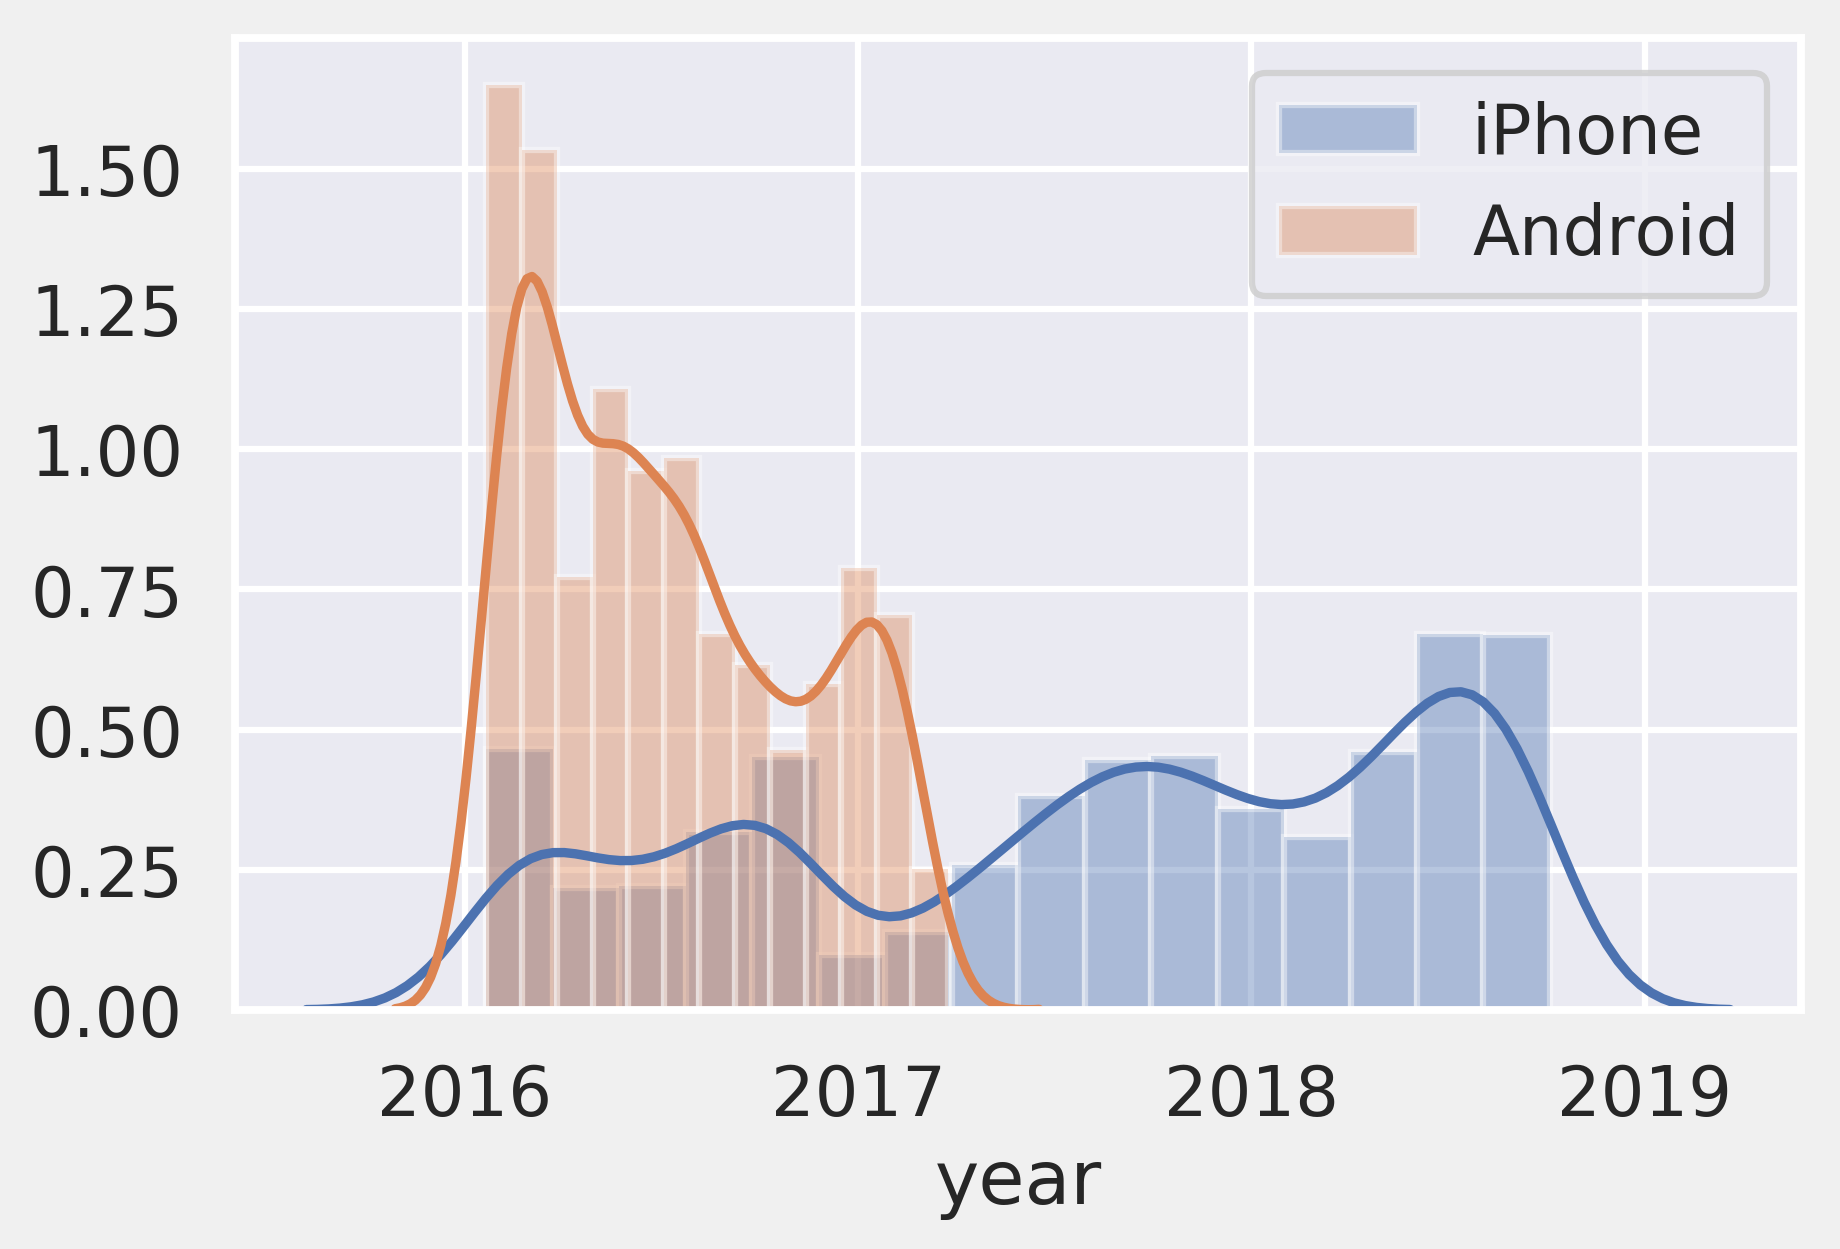

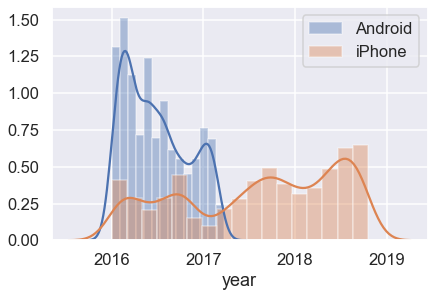

In [39]:
### BEGIN SOLUTION

sns.distplot(df_trump[df_trump.source == 'Twitter for Android']['year'], label='Android')
sns.distplot(df_trump[df_trump.source == 'Twitter for iPhone']['year'], label='iPhone')
plt.legend()
### END SOLUTION

## PART 4 - Sentiment Analysis

It turns out that we can use the words in Trump's tweets to calculate a measure of the sentiment of the tweet. For example, the sentence "I love America!" has positive sentiment, whereas the sentence "I hate taxes!" has a negative sentiment. In addition, some words have stronger positive / negative sentiment than others: "I love America." is more positive than "I like America."

We will use the [VADER (Valence Aware Dictionary and sEntiment Reasoner)](https://github.com/cjhutto/vaderSentiment) lexicon to analyze the sentiment of Trump's tweets. VADER is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media which is great for our usage.

The VADER lexicon gives the sentiment of individual words. Run the following cell to show the first few rows of the lexicon:

In [40]:
print(''.join(open("data/vader_lexicon.txt").readlines()[:10]))

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



### Task 4.1

As you can see, the lexicon contains emojis too! The first column of the lexicon is the *token*, or the word itself. The second column is the *polarity* of the word, or how positive / negative it is.

(How did they decide the polarities of these words? What are the other two columns in the lexicon? See the link above.)

 Read in the lexicon into a DataFrame called `df_sent`. The index of the DF should be the tokens in the lexicon. `df_sent` should have one column: `polarity`: The polarity of each token.

In [41]:
### BEGIN SOLUTION
tokens = []
polarities = []
lexicons = ''.join(open("data/vader_lexicon.txt").readlines()).split('\n')

for x in lexicons:
    strings = x.split('\t')
    if strings[0] == '':
        break
    tokens.append(strings[0])
    polarities.append(strings[1])
    
df_sent = pd.DataFrame(polarities, index = tokens, columns = ['polarity'])
df_sent

    

### END SOLUTION

,polarity
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7
( '}{' ),1.6
(%,-0.9
('-:,2.2
(':,2.3
((-:,2.1


### Task 4.2

Now, let's use this lexicon to calculate the overall sentiment for each of Trump's tweets. Here's the basic idea:

1. For each tweet, find the sentiment of each word.
2. Calculate the sentiment of each tweet by taking the sum of the sentiments of its words.

First, let's lowercase the text in the tweets since the lexicon is also lowercase. Set the `text` column of the `df_trump` DF to be the lowercased text of each tweet.

In [42]:
### BEGIN SOLUTION

df_trump['text'] = df_trump['text'].apply(lambda x: x.lower())

### END SOLUTION

### Task 4.3

Now, let's get rid of punctuation since it'll cause us to fail to match words. Create a new column called `no_punc` in the `df_trump` to be the lowercased text of each tweet with all punctuation replaced by a single space. We consider punctuation characters to be any character that isn't a Unicode word character or a whitespace character. You may want to consult the Python documentation on regexes for this problem.

(Why don't we simply remove punctuation instead of replacing with a space? See if you can figure this out by looking at the tweet data.)

In [43]:
# Save your regex in punct_re
punct_re = r'[^\w\s]'


### BEGIN SOLUTION
punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def removePunc(string):
    temp = re.sub(punct_re, ' ', string)
    temp = re.sub(r'\_',' ',temp)
    return temp

df_trump['no_punc'] = df_trump['text'].apply(removePunc)
df_trump

### END SOLUTION

,time,source,text,retweet_count,est_time,hour,year,no_punc
id,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108.0,2015-12-31 19:44:14-05:00,19.737222,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460.0,2015-12-31 22:25:27-05:00,22.424167,2016.000000,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434.0,2016-01-01 00:18:23-05:00,0.306389,2016.000000,happynewyearamerica https t co eeqb8pdrue
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948.0,2016-01-01 01:07:28-05:00,1.124444,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721.0,2016-01-01 01:08:06-05:00,1.135000,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus
683037464504745985,2016-01-01 21:29:56+00:00,Twitter for Android,"""@sprinklermanus: @cnn @realdonaldtrump they're spending millions but you're still going to win - go donald trump""",933.0,2016-01-01 16:29:56-05:00,16.498889,2016.000000,sprinklermanus cnn realdonaldtrump they re spending millions but you re still going to win go donald trump
683060169677344768,2016-01-01 23:00:09+00:00,Twitter for Android,"well, the year has officially begun. i have many stops planned and will be working very hard to win so that we can turn our country around!",2642.0,2016-01-01 18:00:09-05:00,18.002500,2016.000000,well the year has officially begun i have many stops planned and will be working very hard to win so that we can turn our country around
683060654098530305,2016-01-01 23:02:05+00:00,Twitter for Android,"""@marie7777777777: @realdonaldtrump we love u to trump family. god bless you.""",654.0,2016-01-01 18:02:05-05:00,18.034722,2016.000000,marie7777777777 realdonaldtrump we love u to trump family god bless you
683061678246903808,2016-01-01 23:06:09+00:00,Twitter for Android,"""@jodil792: we are standing with you! spreading the word...trump for president 2016!! i wake &amp; sleep praying for you &amp; the usa!+israel2""",893.0,2016-01-01 18:06:09-05:00,18.102500,2016.000000,jodil792 we are standing with you spreading the word trump for president 2016 i wake amp sleep praying for you amp the usa israel2


In [44]:
assert isinstance(punct_re, str)
assert re.search(punct_re, 'this') is None
assert re.search(punct_re, 'this is ok') is None
assert re.search(punct_re, 'this is\nok') is None
assert re.search(punct_re, 'this is not ok.') is not None
assert re.search(punct_re, 'this#is#ok') is not None
assert re.search(punct_re, 'this^is ok') is not None
assert df_trump['no_punc'].loc[800329364986626048] == 'i watched parts of  nbcsnl saturday night live last night  it is a totally one sided  biased show   nothing funny at all  equal time for us '
assert df_trump['text'].loc[884740553040175104] == 'working hard to get the olympics for the united states (l.a.). stay tuned!'


### Task 4.4


Now, let's convert the tweets into what's called a [*tidy format*](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) to make the sentiments easier to calculate. Use the `no_punc` column of `df_trump` to create a table called `tidy_format`. The index of the table should be the IDs of the tweets, repeated once for every word in the tweet. It has two columns:

1. `num`: The location of the word in the tweet. For example, if the tweet was "i love america", then the location of the word "i" is 0, "love" is 1, and "america" is 2.
2. `word`: The individual words of each tweet.

The first few rows of our `tidy_format` table look like:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>num</th>
      <th>word</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>894661651760377856</th>
      <td>0</td>
      <td>i</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>1</td>
      <td>think</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>2</td>
      <td>senator</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>3</td>
      <td>blumenthal</td>
    </tr>
    <tr>
      <th>894661651760377856</th>
      <td>4</td>
      <td>should</td>
    </tr>
  </tbody>
</table>

**Note that you'll get different results depending on when you pulled in the tweets.** However, you can double check that your tweet with ID `894661651760377856` has the same rows as ours. Our tests don't check whether your table looks exactly like ours.

As usual, try to avoid using any for loops. Our solution uses a chain of 5 methods on the 'trump' DF, albeit using some rather advanced Pandas hacking.

* **Hint 1:** Try looking at the `expand` argument to pandas' `str.split`.

* **Hint 2:** Try looking at the `stack()` method.

* **Hint 3:** Try looking at the `level` parameter of the `reset_index` method.

In [45]:
tidy_format = pd.DataFrame()
### BEGIN SOLUTION
ids = []
nums = []
words = []
for index, row in df_trump.iterrows():
    id = index
    num = 0
    text = row.no_punc.split()
    for x in text:
        ids.append(id)
        nums.append(num)
        num = num + 1
        words.append(x)
        
tidy_format = pd.DataFrame({'id': ids, 'num': nums, 'word': words})
tidy_format = tidy_format.set_index('id')
tidy_format

### END SOLUTION

,num,word
id,,
682723973449289728,0,i
682723973449289728,1,will
682723973449289728,2,be
682723973449289728,3,on
682723973449289728,4,foxnews
682723973449289728,5,live
682723973449289728,6,with
682723973449289728,7,members
682723973449289728,8,of


In [46]:
assert tidy_format.loc[894661651760377856].shape == (27, 2)
assert ' '.join(list(tidy_format.loc[894661651760377856]['word'])) == 'i think senator blumenthal should take a nice long vacation in vietnam where he lied about his service so he can at least say he was there'

### Task 4.5

Now that we have this table in the tidy format, it becomes much easier to find the sentiment of each tweet: we can join the table with the lexicon table. 

Add a `polarity` column to the `trump` table.  The `polarity` column should contain the sum of the sentiment polarity of each word in the text of the tweet.

**Hint** you will need to merge the `tidy_format` and `sent` tables and group the final answer.


In [47]:
##df_trump['polarity'] =

### BEGIN SOLUTION
polarities = []
for index, row in df_trump.iterrows():
    text = list(tidy_format.loc[index].word)
    pol = 0.0
    for x in text:
        if x in df_sent.index:
            pol = pol + float(df_sent[df_sent.index == x].iloc[0].polarity)
    polarities.append(pol)

df_trump['polarity'] = polarities
df_trump
### END SOLUTION

,time,source,text,retweet_count,est_time,hour,year,no_punc,polarity
id,,,,,,,,,
682723973449289728,2016-01-01 00:44:14+00:00,Twitter for Android,"i will be on @foxnews live, with members of my family, at 11:50 p.m. we will ring in the new year together! make america great again!",2108.0,2015-12-31 19:44:14-05:00,19.737222,2016.000000,i will be on foxnews live with members of my family at 11 50 p m we will ring in the new year together make america great again,3.1
682764544402440192,2016-01-01 03:25:27+00:00,Twitter for iPhone,happy new year &amp; thank you! https://t.co/yo1yi8qbzy https://t.co/uxuxwj1rbv,3460.0,2015-12-31 22:25:27-05:00,22.424167,2016.000000,happy new year amp thank you https t co yo1yi8qbzy https t co uxuxwj1rbv,4.2
682792967736848385,2016-01-01 05:18:23+00:00,Twitter for iPhone,#happynewyearamerica! https://t.co/eeqb8pdrue,3434.0,2016-01-01 00:18:23-05:00,0.306389,2016.000000,happynewyearamerica https t co eeqb8pdrue,0.0
682805320217980929,2016-01-01 06:07:28+00:00,Twitter for iPhone,happy new year from #maralago! thank you to my great family for all of their support. https://t.co/6usqsiaaj7,1948.0,2016-01-01 01:07:28-05:00,1.124444,2016.000000,happy new year from maralago thank you to my great family for all of their support https t co 6usqsiaaj7,9.0
682805477168779264,2016-01-01 06:08:06+00:00,Twitter for Android,"""@jallenaip: hillary said she was in a ""fog of war"" as explanation for the lies about benghazi. no fog allowed in wh. vote trump potus!""",2721.0,2016-01-01 01:08:06-05:00,1.135000,2016.000000,jallenaip hillary said she was in a fog of war as explanation for the lies about benghazi no fog allowed in wh vote trump potus,-5.9
683037464504745985,2016-01-01 21:29:56+00:00,Twitter for Android,"""@sprinklermanus: @cnn @realdonaldtrump they're spending millions but you're still going to win - go donald trump""",933.0,2016-01-01 16:29:56-05:00,16.498889,2016.000000,sprinklermanus cnn realdonaldtrump they re spending millions but you re still going to win go donald trump,2.8
683060169677344768,2016-01-01 23:00:09+00:00,Twitter for Android,"well, the year has officially begun. i have many stops planned and will be working very hard to win so that we can turn our country around!",2642.0,2016-01-01 18:00:09-05:00,18.002500,2016.000000,well the year has officially begun i have many stops planned and will be working very hard to win so that we can turn our country around,2.9
683060654098530305,2016-01-01 23:02:05+00:00,Twitter for Android,"""@marie7777777777: @realdonaldtrump we love u to trump family. god bless you.""",654.0,2016-01-01 18:02:05-05:00,18.034722,2016.000000,marie7777777777 realdonaldtrump we love u to trump family god bless you,6.1
683061678246903808,2016-01-01 23:06:09+00:00,Twitter for Android,"""@jodil792: we are standing with you! spreading the word...trump for president 2016!! i wake &amp; sleep praying for you &amp; the usa!+israel2""",893.0,2016-01-01 18:06:09-05:00,18.102500,2016.000000,jodil792 we are standing with you spreading the word trump for president 2016 i wake amp sleep praying for you amp the usa israel2,1.5


In [48]:
assert np.allclose(df_trump.loc[744701872456536064, 'polarity'], 8.4)
assert np.allclose(df_trump.loc[745304731346702336, 'polarity'], 2.5)
assert np.allclose(df_trump.loc[744519497764184064, 'polarity'], 1.7)
assert np.allclose(df_trump.loc[894661651760377856, 'polarity'], 0.2)
assert np.allclose(df_trump.loc[894620077634592769, 'polarity'], 5.4)


### Task 4.6
Now we have a measure of the sentiment of each of his tweets! You can read over the VADER readme to understand a more robust sentiment analysis.
Now, write the code to see the most positive and most negative tweets from Trump in your dataset:
Find the most negative and most positive tweets made by Trump

In [50]:
### BEGIN SOLUTION

#df_trump[df_trump['polarity'] == df_trump['polarity'].max()]
df_trump.sort_values(by='polarity', ascending=False).head(5)

### END SOLUTION

,time,source,text,retweet_count,est_time,hour,year,no_punc,polarity
id,,,,,,,,,
983143317889323008,2018-04-09 00:43:27+00:00,Twitter for iPhone,"congratulations to patrick reed on his great and courageous masters win! when patrick had his amazing win at doral 5 years ago, people saw his great talent, and a bright future ahead. now he is the masters champion!",12169.0,2018-04-08 19:43:27-05:00,19.724167,2018.268493,congratulations to patrick reed on his great and courageous masters win when patrick had his amazing win at doral 5 years ago people saw his great talent and a bright future ahead now he is the masters champion,26.5
1007974129474121728,2018-06-16 13:12:14+00:00,Twitter for iPhone,"my supporters are the smartest, strongest, most hard working and most loyal that we have seen in our countries history. it is a beautiful thing to watch as we win elections and gather support from all over the country. as we get stronger, so does our country. best numbers ever!",42103.0,2018-06-16 08:12:14-05:00,8.203889,2018.454795,my supporters are the smartest strongest most hard working and most loyal that we have seen in our countries history it is a beautiful thing to watch as we win elections and gather support from all over the country as we get stronger so does our country best numbers ever,20.7
1016638035281219584,2018-07-10 10:59:30+00:00,Twitter for iPhone,"thank you to all of my great supporters, really big progress being made. other countries wanting to fix crazy trade deals. economy is roaring. supreme court pick getting great reviews. new poll says trump, at over 90%, is the most popular republican in history of the party. wow!",25284.0,2018-07-10 05:59:30-05:00,5.991667,2018.520548,thank you to all of my great supporters really big progress being made other countries wanting to fix crazy trade deals economy is roaring supreme court pick getting great reviews new poll says trump at over 90 is the most popular republican in history of the party wow,18.9
1014287566386888709,2018-07-03 23:19:35+00:00,Twitter for iPhone,"thank you, @wvgovernor jim justice, for that warm introduction. tonight, it was my great honor to attend the “greenbrier classic – salute to service dinner” in west virginia! god bless our veterans. god bless america - and happy independence day to all! https://t.co/v35qvcn8m6",9951.0,2018-07-03 18:19:35-05:00,18.326389,2018.501370,thank you wvgovernor jim justice for that warm introduction tonight it was my great honor to attend the greenbrier classic salute to service dinner in west virginia god bless our veterans god bless america and happy independence day to all https t co v35qvcn8m6,18.6
994176238846664706,2018-05-09 11:24:20+00:00,Twitter for iPhone,"the republican party had a great night. tremendous voter energy and excitement, and all candidates are those who have a great chance of winning in november. the economy is sooo strong, and with nancy pelosi wanting to end the big tax cuts and raise taxes, why wouldn’t we win?",18374.0,2018-05-09 06:24:20-05:00,6.405556,2018.350685,the republican party had a great night tremendous voter energy and excitement and all candidates are those who have a great chance of winning in november the economy is sooo strong and with nancy pelosi wanting to end the big tax cuts and raise taxes why wouldn t we win,18.5


In [51]:
### BEGIN SOLUTION

df_trump.sort_values(by='polarity').head(5)
### END SOLUTION

,time,source,text,retweet_count,est_time,hour,year,no_punc,polarity
id,,,,,,,,,
1031590431379865600,2018-08-20 17:14:59+00:00,Twitter for iPhone,"it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u.s. postal system from china. we can, and must, end this now! the senate should pass the stop act – and firmly stop this poison from killing our children and destroying our country. no more delay!",28007.0,2018-08-20 12:14:59-05:00,12.249722,2018.632877,it is outrageous that poisonous synthetic heroin fentanyl comes pouring into the u s postal system from china we can and must end this now the senate should pass the stop act and firmly stop this poison from killing our children and destroying our country no more delay,-20.3
1029731513573822464,2018-08-15 14:08:18+00:00,Twitter for iPhone,"the rigged russian witch hunt goes on and on as the “originators and founders” of this scam continue to be fired and demoted for their corrupt and illegal activity. all credibility is gone from this terrible hoax, and much more will be lost as it proceeds. no collusion!",18887.0,2018-08-15 09:08:18-05:00,9.138333,2018.619178,the rigged russian witch hunt goes on and on as the originators and founders of this scam continue to be fired and demoted for their corrupt and illegal activity all credibility is gone from this terrible hoax and much more will be lost as it proceeds no collusion,-16.6
984763579210633216,2018-04-13 12:01:47+00:00,Twitter for iPhone,"james comey is a proven leaker &amp; liar. virtually everyone in washington thought he should be fired for the terrible job he did-until he was, in fact, fired. he leaked classified information, for which he should be prosecuted. he lied to congress under oath. he is a weak a...",31488.0,2018-04-13 07:01:47-05:00,7.029722,2018.279452,james comey is a proven leaker amp liar virtually everyone in washington thought he should be fired for the terrible job he did until he was in fact fired he leaked classified information for which he should be prosecuted he lied to congress under oath he is a weak a...,-16.0
1027585937163931648,2018-08-09 16:02:33+00:00,Twitter for iPhone,"this is an illegally brought rigged witch hunt run by people who are totally corrupt and/or conflicted. it was started and paid for by crooked hillary and the democrats. phony dossier, fisa disgrace and so many lying and dishonest people already fired. 17 angry dems? stay tuned!",25954.0,2018-08-09 11:02:33-05:00,11.042500,2018.602740,this is an illegally brought rigged witch hunt run by people who are totally corrupt and or conflicted it was started and paid for by crooked hillary and the democrats phony dossier fisa disgrace and so many lying and dishonest people already fired 17 angry dems stay tuned,-15.2
1031508193107763200,2018-08-20 11:48:12+00:00,Twitter for iPhone,"where’s the collusion? they made up a phony crime called collusion, and when there was no collusion they say there was obstruction (of a phony crime that never existed). if you fight back or say anything bad about the rigged witch hunt, they scream obstruction!",23739.0,2018-08-20 06:48:12-05:00,6.803333,2018.632877,where s the collusion they made up a phony crime called collusion and when there was no collusion they say there was obstruction of a phony crime that never existed if you fight back or say anything bad about the rigged witch hunt they scream obstruction,-15.0


### Task 4.7
Plot the distribution of tweet sentiments broken down by whether the text of the tweet contains `nyt` or `fox`.  Then in the box below comment on what we observe?

![title](images/nyt_vs_fox.png)

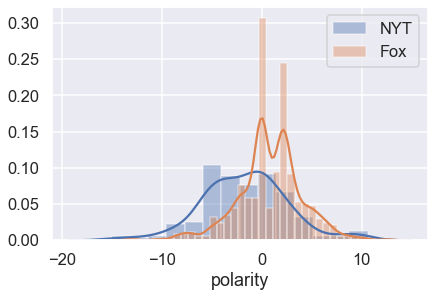

In [52]:
### BEGIN SOLUTION
sns.distplot(df_trump[df_trump['text'].str.contains("nyt")]['polarity'], label='NYT')
sns.distplot(df_trump[df_trump['text'].str.contains("fox")]['polarity'], label='Fox')
plt.legend()
### END SOLUTION

##### Comment on what you observe:

#### BEGIN SOLUTION
<b>Trump's tweets about Fox indicate much higher positive sentiment than than of his tweets about the New York Times, as the distribution shows many more tweets with a positive polarity directed towards Fox than the NYT.</b>
#### END SOLUTION

## PART 5 - Principal Component Analysis (PCA) and Twitter
A look at the top words used and the sentiments expressed in Trump tweets indicates that, some words are used with others almost all the time. A notable example is the slogan like Make America Great Again. As such, it may be beneficial to look at groups of words rather than individual words. For that, we will look at an approach applying a Principal Component Analysis. 

### The PCA
The Principal Component Analysis, or PCA, is a tool generally used to identify patterns and to reduce the number of variables you have to consider in your analysis. For example, if you have data with 200 columns, it may be that a significant amount of the variance in your data can be explained by just 100 principal components. In the PCA, the first component is chosen in such a way that has the largest variance, subsequent components are orthogonal and continue covering as much variance as possible. In this way, the PCA samples as much of the variability in the data set with the first few components. Mathematically, each component is a linear combination of all the input parameters times coefficients specific for that component. These coefficients, or loading factors, are constrained such that the sum of the squares of them are equal to 1. As such, the loading factors serve as weights describing how strongly certain parameters contribute to the specific principal component. Parameters with large values of positive or negative loading factors are correlated with each other, which can serve to identify trends in your data.

### Task 5.1 Cleaning up the Data
Using NLTK (Natural Language Toolkit) package for language processing and other python libraries, parse the json file to deal with inflected words, such as plurals, and removed stop words like common English words (the, and, it, etc) and certain political terms (the candidates names, for example). You can start with the top 50 words, but full analysis may require large number of words.
Create a document-frequecy (df) matrix with 5000 rows and 50 columns where each column is a particular word (feature) and each row is a tweet (observation). The values of the matrix is how often the word appears. Apply the techniques we learned to reduce the weight of most common words (if necessary). Since this is a sparse matrix, you can use the sparse martix libraries to make things a bit more efficient (we can also use a regular numpy arrays to store these things since the dimensions are not too large). Lecture 6.1 captures some sparse matrix routines you can use.
Print the first 10 rows of the df to show the matrix you created

In [53]:
##### BEGIN SOLUTION
## code to plot the first 10 rows of the matrix
import nltk
import nltk.data
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

stopWords=set(stopwords.words('english'))
pol_terms = ['hillary', 'clinton', 'trump', 'democrats', 'obama', 'cruz', 'ted', 'bernie', 'hillaryclinton', 'warren', 'elizabeth', 'republicans']
stopWords.add('https')
stopWords.add('co')
stopWords.add('amp')
stopWords.add('rt')

for x in pol_terms:
    stopWords.add(x)
    
tweet_dict = {}

tweets_list = list(df_trump['no_punc'])

for tweet in tweets_list:
    temp=" ".join(tweet.split())
    split_list = temp.split(" ")
    for word in split_list:
        count=0
        if word in tweet_dict:
            count = tweet_dict.get(word)
        
        if word not in stopWords and len(word) != 1:
            tweet_dict[word] = count + 1
            
original_dict = tweet_dict
tweet_dict = sorted(tweet_dict, key=tweet_dict.get, reverse = True)[:50]
tweets_list = tweets_list[:5000]

df = pd.DataFrame(data = tweets_list, columns = ['sentences'])
vectorizer = CountVectorizer(vocabulary = tweet_dict, min_df = 0, token_pattern=r'(?u)\b\w+\b')
final_data = vectorizer.fit_transform(df['sentences'].values).toarray()
result = pd.DataFrame(data = final_data, columns = vectorizer.get_feature_names())
result.head(10)
        
### END SOLUTION




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mzig2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,great,thank,people,america,realdonaldtrump,president,big,today,new,country,...,job,join,us,first,trade,state,campaign,last,states,said
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Task 5.2 Find the PCA's
Write the code to find the first 50 PCA's for the document-frequency matrix. Pass the document-term-matrix to scikit-learn’s (https://scikit-learn.org/stable/modules/decomposition.html#decompositions) PCA method to obtain the components and loading factors.

In [54]:
### BEGIN SOLUTION
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(result)
print(pca.components_)
print(pca.singular_values_)


### END SOLUTION

[[ 8.14005462e-01  1.88956123e-01  3.42464368e-02 ...  6.16968067e-03
   4.98387524e-03 -2.54332312e-02]
 [-1.40214488e-01  8.29662112e-01 -1.06067086e-01 ... -4.53577479e-03
  -1.58931167e-02 -2.91501144e-02]
 [-1.41465729e-01 -6.71806558e-02 -4.36585049e-01 ... -1.75459420e-02
  -4.59253738e-04 -3.94925187e-02]
 ...
 [-3.99465195e-03  9.58384671e-03  9.71506031e-03 ...  1.61382246e-02
  -1.58002542e-02  5.65818395e-03]
 [-1.10656897e-03  3.19409636e-03  5.87739192e-03 ...  6.54680324e-03
  -1.48512309e-02  1.52394356e-02]
 [ 4.72722120e-03  3.73386088e-03  4.46542708e-03 ... -3.27714002e-03
   2.11028321e-05 -1.49414379e-02]]
[30.07539222 26.29674253 19.93744932 19.37109302 18.40434771 17.9959153
 16.82183395 16.55442974 15.76930362 15.53159557 15.28019768 14.96006419
 14.54544518 14.04910122 13.89447755 13.72190079 13.57102743 13.48456965
 13.23596915 13.175586   13.12996181 12.93723621 12.6465667  12.44744576
 12.37776299 12.22293452 11.88183069 11.64945068 11.42990351 11.24023578


### Task 5.3 Examine the PCA
We can examine the PCA results to look at the heatmap. Make a grid plot which shows the various principal component along the x-axis and the individual words along the y-axes. Each grid box should be color-coded based on the sign of the loading factor and how large the square of that value is. Looking at it vertically, you can see which words constitute your principal components. Looking at it horizontally, you can see how individual terms are shared between components. 

![title](images/PCAmatrix.png)



[Text(0, 0.5, 'great'),
 Text(0, 1.5, 'thank'),
 Text(0, 2.5, 'people'),
 Text(0, 3.5, 'america'),
 Text(0, 4.5, 'realdonaldtrump'),
 Text(0, 5.5, 'president'),
 Text(0, 6.5, 'big'),
 Text(0, 7.5, 'today'),
 Text(0, 8.5, 'new'),
 Text(0, 9.5, 'country'),
 Text(0, 10.5, 'make'),
 Text(0, 11.5, 'get'),
 Text(0, 12.5, 'news'),
 Text(0, 13.5, 'many'),
 Text(0, 14.5, 'time'),
 Text(0, 15.5, 'would'),
 Text(0, 16.5, 'fake'),
 Text(0, 17.5, 'trump2016'),
 Text(0, 18.5, 'vote'),
 Text(0, 19.5, 'never'),
 Text(0, 20.5, 'much'),
 Text(0, 21.5, 'media'),
 Text(0, 22.5, 'american'),
 Text(0, 23.5, 'crooked'),
 Text(0, 24.5, 'jobs'),
 Text(0, 25.5, 'one'),
 Text(0, 26.5, 'going'),
 Text(0, 27.5, 'good'),
 Text(0, 28.5, 'back'),
 Text(0, 29.5, 'must'),
 Text(0, 30.5, 'want'),
 Text(0, 31.5, 'makeamericagreatagain'),
 Text(0, 32.5, 'like'),
 Text(0, 33.5, 'bad'),
 Text(0, 34.5, 'win'),
 Text(0, 35.5, 'years'),
 Text(0, 36.5, 'tax'),
 Text(0, 37.5, 'election'),
 Text(0, 38.5, 'day'),
 Text(0, 39.5, 'e

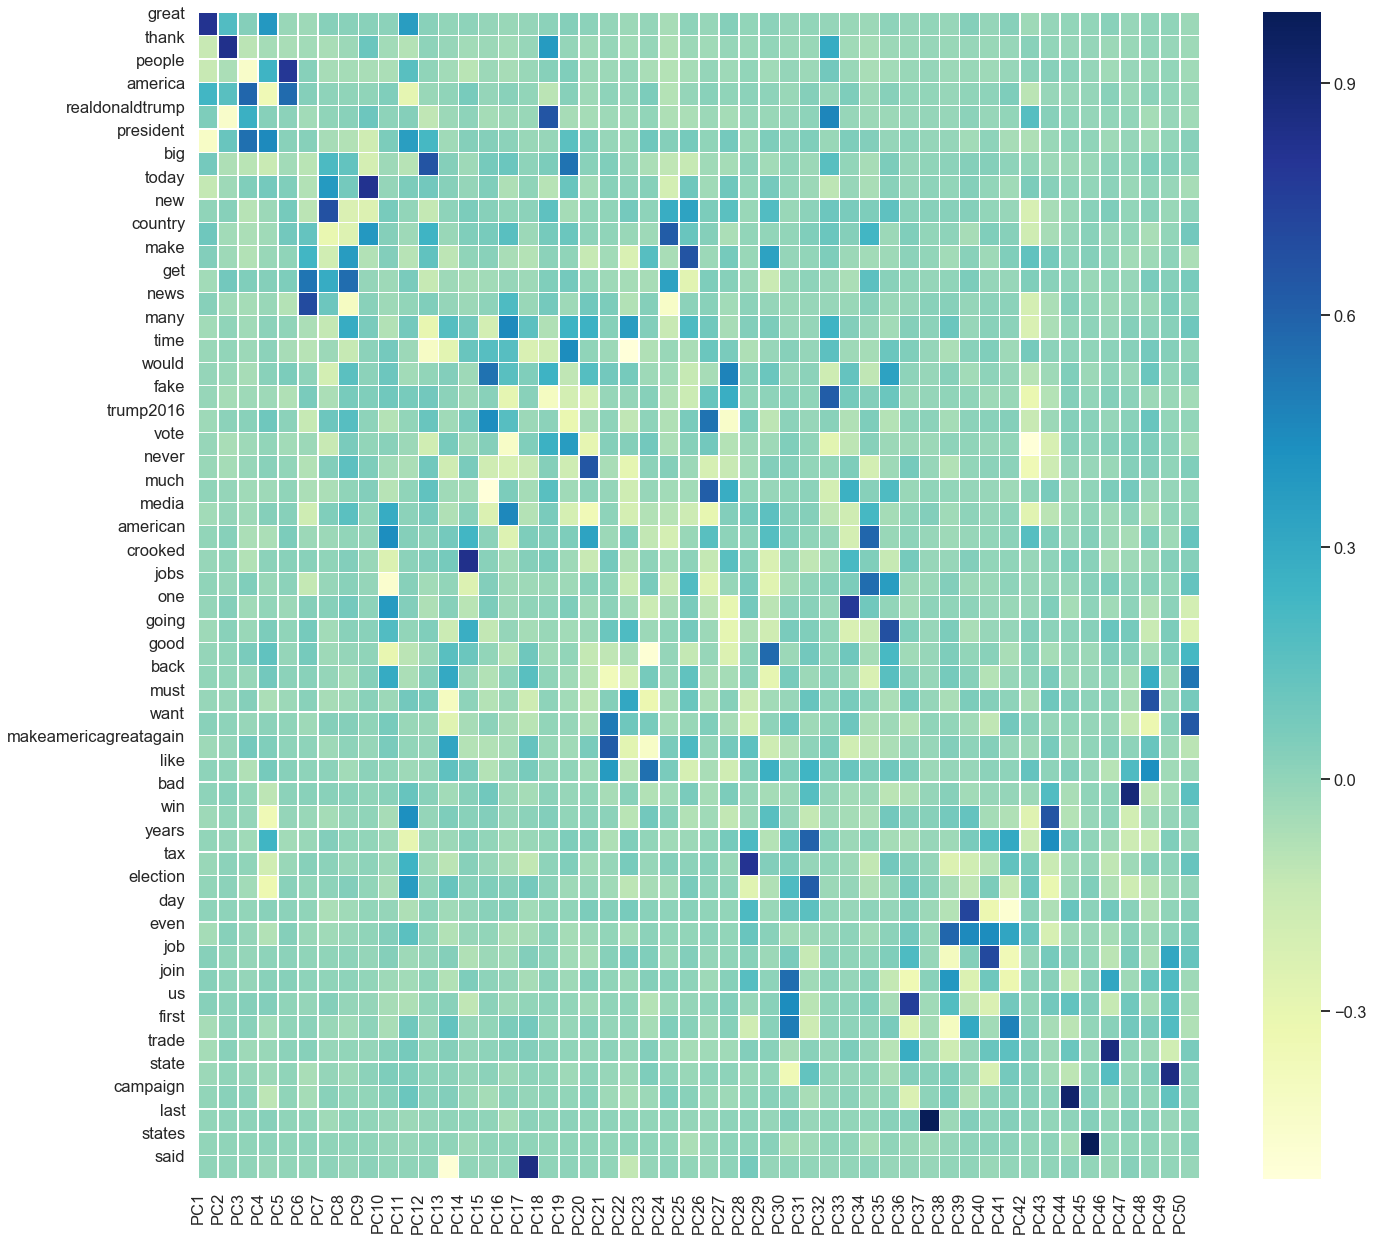

In [55]:
### BEGIN SOLUTION
plt.figure(figsize = (20,20))
ax = sns.heatmap(pca.components_, linewidths=.5, cmap="YlGnBu")
ax.set_xticks(np.arange(50))
ax.set_yticks(np.arange(50))
ax.set_xticklabels(["PC{}".format(i) for i in range (1,51)], rotation=90)
ax.set_yticklabels(tweet_dict, rotation=0)
### END SOLUTION

### Task 5.4 PCA Compare
We can determine how many words and how many components are needed to do a good visualization. Plot PC1 and PC2 in a 2D plot. The results should be similar to following scatter plot 

![title](images/PC1_PC2.png)

This is a scatter plot of the values of the components, but with arrows indicating some of the prominent terms as indicated by their loading factors. The values of the loading factors are used to determine the length and direction of these arrows and as such they serve as a way of expressing direction. That is, tweets which use these terms will be moved along the length of those arrows. Shown are the most important parameters.

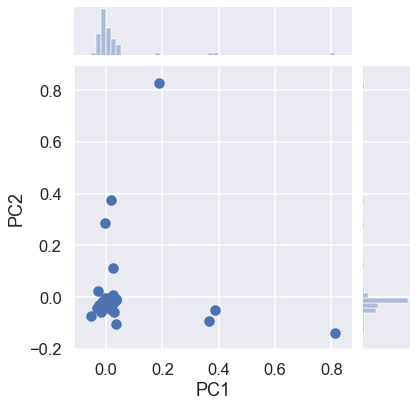

In [56]:
### BEGIN SOLUTION
PC1 = pd.DataFrame(pca.components_[0])
PC2 = pd.DataFrame(pca.components_[1])
pcs = [PC1, PC2]
PC3 = pd.concat(pcs, axis = 1)
PC3.columns= ['PC1', 'PC2']
ax = sns.JointGrid(x="PC1", y="PC2", data=PC3)
ax = ax.plot_joint(plt.scatter)
ax = ax.plot_marginals(sns.distplot, kde=False)

### END SOLUTION

## PART 6 - Twitter Engagement

In this problem, we'll explore which words led to a greater average number of retweets. For example, at the time of this writing, Donald Trump has two tweets that contain the word 'oakland' (tweets 932570628451954688 and 1016609920031117312) with 36757 and 10286 retweets respectively, for an average of 23,521.5.


Your `top_20` table should have this format:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>retweet_count</th>
    </tr>
    <tr>
      <th>word</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>jong</th>
      <td>40675.666667</td>
    </tr>
    <tr>
      <th>try</th>
      <td>33937.800000</td>
    </tr>
    <tr>
      <th>kim</th>
      <td>32849.595745</td>
    </tr>
    <tr>
      <th>un</th>
      <td>32741.731707</td>
    </tr>
    <tr>
      <th>maybe</th>
      <td>30473.192308</td>
    </tr>
  </tbody>
</table>

### Task 6.1
Find the top 20 most retweeted words. Include only words that appear in at least 25 tweets. As usual, try to do this without any for loops. You can string together ~7 pandas commands and get everything done on one line.

In [57]:

### BEGIN SOLUTION
top_20 = tidy_format.merge(df_trump, left_on=tidy_format.index, right_on=df_trump.index).groupby("word").filter(lambda x: len(x) > 25).groupby("word").mean().sort_values(by="retweet_count", ascending=False)['retweet_count'][:20].to_frame()
top_20
### END SOLUTION

,retweet_count
word,
jong,39782.800000
un,32070.756098
kim,31764.897959
maybe,29899.846154
nuclear,28685.140000
kavanaugh,28651.962963
try,28256.551724
mccabe,27666.870968
old,27613.151515


### Task 6.2
Plot a bar chart of your results:

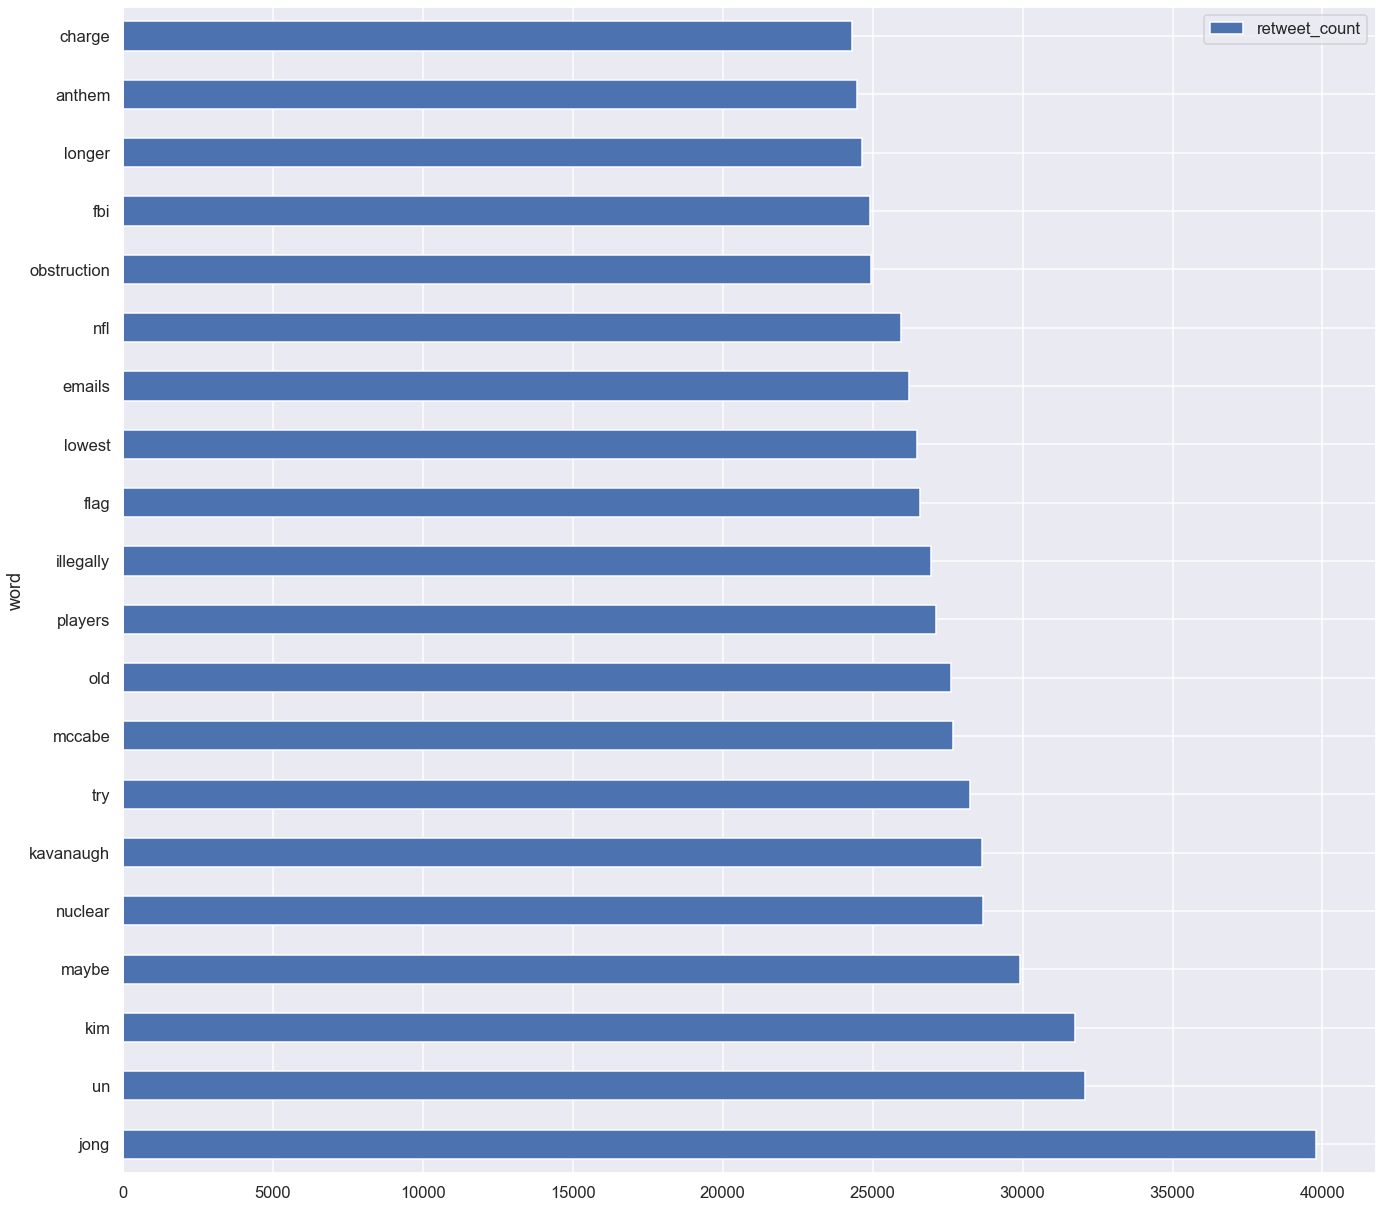

In [58]:
### BEGIN SOLUTION
ax = top_20.plot(kind='barh', figsize=(20,20))
### BEGIN SOLUTION

## PART 7 - Conclusion (Optional for Individual)
What else can we do? Let us ask some open ended questions.

### Task 7.1
"kim", "jong" and "un" are apparently really popular in Trump's tweets! It seems like we can conclude that his tweets involving jong are more popular than his other tweets. Or can we?

Consider each of the statements about possible confounding factors below. State whether each statement is true or false and explain. If the statement is true, state whether the confounding factor could have made kim jong un related tweets higher in the list than they should be.

1. We didn't restrict our word list to nouns, so we have unhelpful words like "let" and "any" in our result.
      
1. We didn't remove hashtags in our text, so we have duplicate words (eg. #great and great).
      
1. We didn't account for the fact that Trump's follower count has increased over time.
      

In [ ]:
#### BEGIN SOLUTION

#### END SOLUTION

### Task 7.2
Using the `df_trump` tweets construct an interesting plot describing a property of the data and discuss what you found below.

**Ideas:**

1. How has the sentiment changed with length of the tweets?
1. Does sentiment affect retweet count?
1. Are retweets more negative than regular tweets?
1. Are there any spikes in the number of retweets and do the correspond to world events? 
1. What terms have an especially positive or negative sentiment?

You can look at other data sources and even tweets. Do some plots and discuss. You can add more cells here as needed.


In [ ]:
#### BEGIN SOLUTION



#### END SOLUTION


#### BEGIN SOLUTION
Discussion:


#### END SOLUTION

### Find Something interesting (Optional for Individuals)
Is there still something interesting to find in this data set? Use your own imagination to ask some good questions. Don't be bias and look for the answer in data. Don't ask us what we want, because we do not know either. This will be for EXTRA CREDIT for individuals but part of the regular assignment for groups. Add any cells below.


<div class="alert alert-block alert-info">
<h2>Submission Instructions</h2> 
<b> File Name:</b> Please name the file as <your_section>_<your_netID>_midsemester.jpynb<br>
<b> Submit To: </b> Canvas &rarr; Assignments &rarr; midsemester <br>
<b>Warning:</b> Failure to follow directions may result in loss points.<br>
</div>

Created by Andy Guna @2018 Credits: Josh Hug, and Berkeley Data Science Group, Steve Skiena, David Rodreguez